In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
from sklearn import preprocessing, svm

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("data/stock.csv")

In [7]:
df = df[df['symbol'] == "AAPL"]

In [8]:
len(df)

1762

In [9]:
df.set_index("date", drop=True, inplace=True)

In [10]:
df.columns

Index(['symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [11]:
df.fillna(-99999, inplace=True)

In [12]:
df['label'] = df['close'].shift(-30)

In [13]:
df['feature1'] = (df['close'] - df['high'])/df['close']

In [14]:
df['feature2'] = (df['close'] - df['open'])/df['open']

In [15]:
df = df[:-30]

In [16]:
fut_df = df[-30:]

In [17]:
X = np.array(df.drop(['label', 'symbol'], 1))

In [18]:
y = np.array(df['label'])

In [19]:
X = preprocessing.scale(X)

In [20]:
print(len(X), len(y))

1732 1732


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [22]:
clf = LinearRegression()

In [23]:
accuracy = clf.fit(X_train, Y_train)

In [24]:
accuracy = clf.score(X_train, Y_train)

In [25]:
print(accuracy)

0.935841361143


In [26]:
clf.predict(preprocessing.scale(np.array(fut_df.drop(['label', 'symbol'], 1))))

array([  79.70420789,   81.41047835,   98.87887407,   96.30068768,
        104.53556596,  107.70481318,  106.77224634,  108.89847689,
        105.03050086,  134.13300287,  104.71729849,   98.50423189,
        106.77704664,  110.43608412,   96.26768313,   85.91932157,
         76.03838231,   74.95008671,   72.87973642,   58.731612  ,
         51.61354691,   42.10617519,   52.03703806,   63.31952284,
         68.24417535,   59.05106543,   43.42611364,   32.49459626,
         27.0537136 ,   58.81862351])

In [27]:
fut_df['label'] = clf.predict(preprocessing.scale(np.array(fut_df.drop(['label', 'symbol'], 1))))

/Users/ssrungarapu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
df = pd.concat([df, fut_df])

In [29]:
import matplotlib.pyplot as plt

In [30]:
from matplotlib import style

In [31]:
style.use('ggplot')

In [32]:
(df['label']).plot()

In [33]:
plt.legend(loc=4)

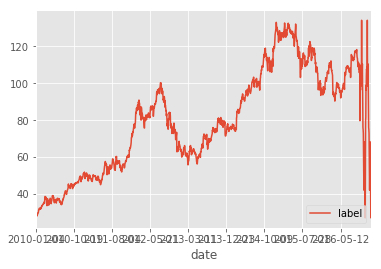

In [34]:
plt.show()